## Hello Kaggler!
## <span style="color:PURPLE">Objective of this kernal is to provide an understanding on the <span style="color:red">basic workflow in a predictive modeling problem</span> </span>.



---

### So ...
### **IF** : <span style="color:BLACK">you are new to data science and yet to  write your first kernel on a predictive modeling problem</span> -> <span style="color:BROWN">I bet you will get something reading this.</span>
### **ELSE** -> <span style="color:BROWN">I bet that your feedback will definetly help me improving this kernal. So please.. :)</span>
---

## **Basic workflow in a predictive modeling problem**

**<center><span style="color:blue">Exploratory Data Analysis</span> -> <span style="color:green">Feature Engineering and Data Cleaning</span> -> <span style="color:red">Predictive Modeling</span></center>.**

1. First we need to see what the data can tell us: We call this **<span style="color:blue">Exploratory Data Analysis(EDA)</span>**. Here we look at data which is hidden in rows and column format and try to visualize, summarize and interprete it looking for information.
1. Next we can **leverage domain knowledge** to boost machine learning model performance. We call this step, **<span style="color:green">Feature Engineering and Data Cleaning</span>**. In this step we might add few features, Remove redundant features, Converting features into suitable form for modeling.
1. Then we can move on to the **<span style="color:red">Predictive Modeling</span>**. Here we try basic ML algorthms, cross validate, ensemble and Important feature Extraction.

---

# Now with the big picture in mind, let's start!


## First and foremost let's feel it.

## Titanic : The Unsinkable Ship and the Iceberg

“Fifteen-hundred people went into the sea, when Titanic sank from under us. There were twenty boats floating nearby… and only one came back. One. Six were saved from the water, myself included. Six… out of fifteen-hundred. Afterward, the seven-hundred people in the boats had nothing to do but wait… wait to die… wait to live… wait for an absolution… that would never come.”
—Rose


RMS Titanic sank in the early morning of 15 April 1912 in the North Atlantic Ocean, four days into the ship's maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time) on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of history's deadliest marine disasters during peacetime
-*Wikipedia*[](http://)

---

# PART 1 : Exploratory Data Analysis (EDA)

With the objective in mind that this kernal aims to explain the workflow of a predictive modelling problem for begginers, I will try to use simple easy to understand visualizations in the EDA section. Kernals with more advanced EDA sections will be mentioned at the end for you to learn more.

In [1]:
# Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Read data to a pandas data frame
data=pd.read_csv('../input/train.csv')

In [3]:
# lets have a look on first few rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking shape of our data set
data.shape

(891, 12)

* We have 891 data points (rows); each data point has 12 columns.

In [5]:
#checking for null value counts in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* The Age, Cabin and Embarked have null values.

## Lets look at overall survival stats

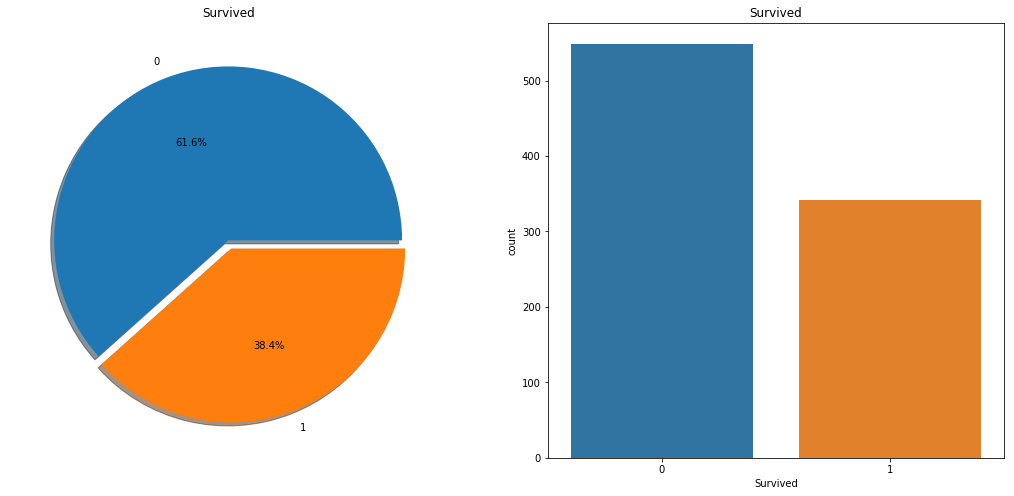

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* Sad Story! Only 38% have survived. That is roughly 340 out of 891. 

## Let's analyse features 

### Feature: Sex

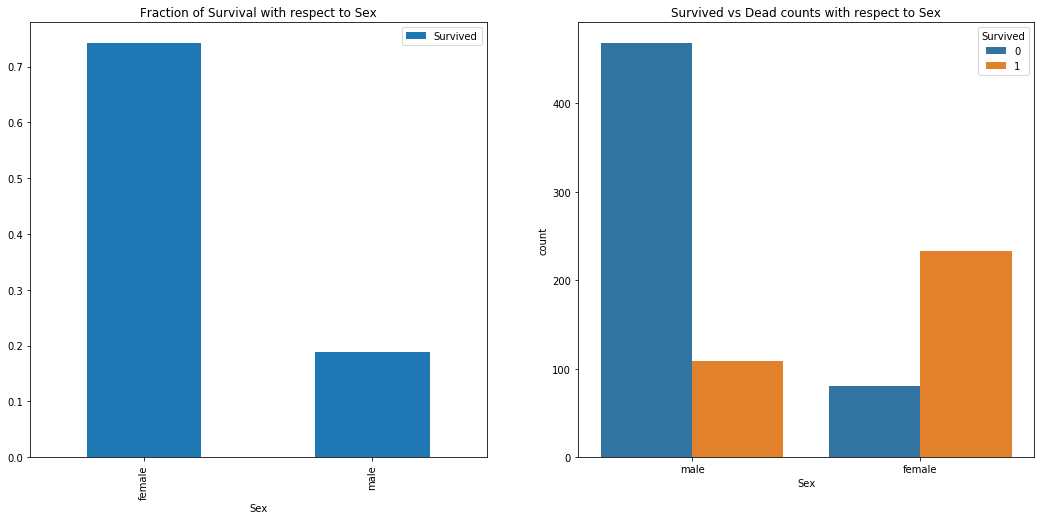

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fraction of Survival with respect to Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Sex')
plt.show()

* While survival rate for female is around 75%, same for men is about 20%.
* It looks like they have given priority to female passengers in the rescue.
* **Looks like Sex is a good predictor on the survival.**

### Feature: Pclass
**Meaning :** Ticket class : 1 = 1st, 2 = 2nd, 3 = 3rd

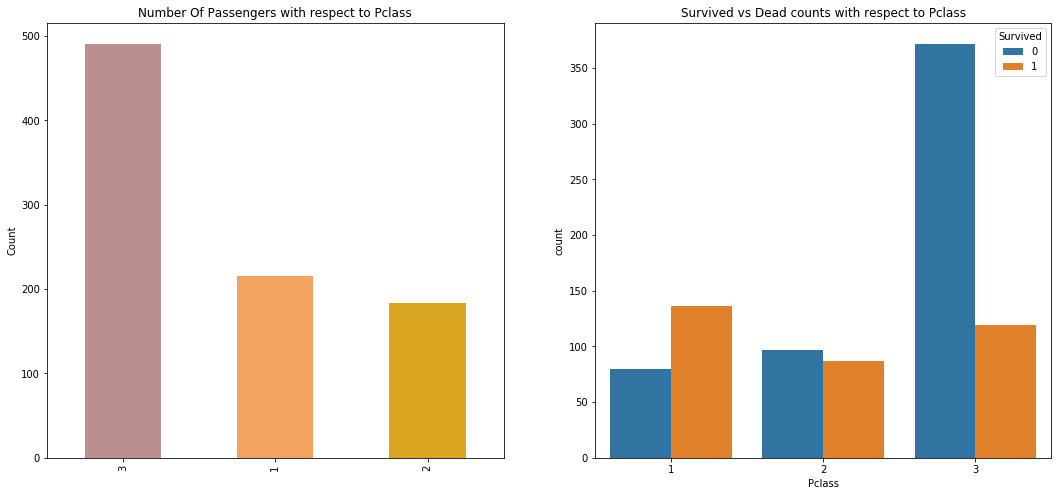

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#BC8F8F','#F4A460','#DAA520'],ax=ax[0])
ax[0].set_title('Number Of Passengers with respect to Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Pclass')
plt.show()

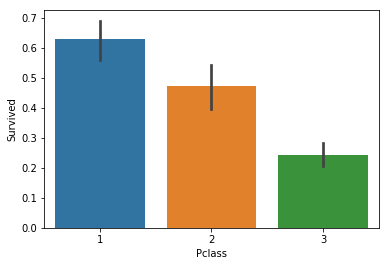

In [9]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=data)

* For Pclass 1 %survived is around 63%, for Pclass2 is around 48% and for Pclass2 is around 25%.
* **So its clear that higher classes had higher priority while rescue.**
* **Looks like Pclass is also an important feature.**

### Lets check survival rate with Sex and Pclass Together

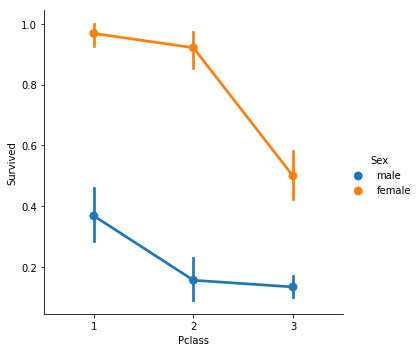

In [10]:
sns.catplot('Pclass','Survived',hue='Sex',data=data,kind='point')
plt.show()

* And it looks like irrespective of the class females were given high priority while rescue.

### Feature: Age
**Meaning :** Age in years

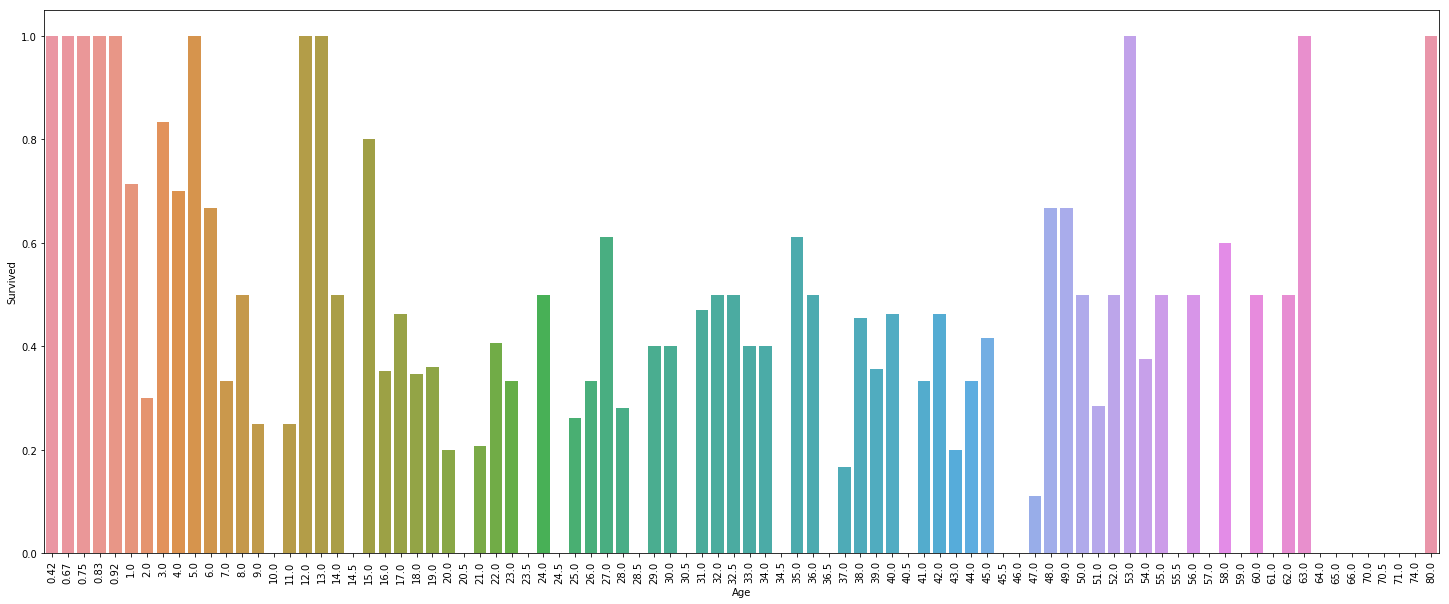

In [11]:
# Plot
plt.figure(figsize=(25,10))
sns.barplot(data['Age'],data['Survived'], ci=None)
plt.xticks(rotation=90);

* Survival rate for passenegers below Age 14(i.e children) looks to be good than others.
* So Age seems an important feature too.
* Rememer we had 177 null values in the Age feature. How are we gonna fill them?.

#### Filling Age NaN

Well there are many ways to do this. One can use the mean value or median .. etc.. But can we do better?. Seems yes. [EDA To Prediction(DieTanic)](https://www.kaggle.com/ash316/eda-to-prediction-dietanic#EDA-To-Prediction-(DieTanic)) has used a wonderful method which I would use here too. There is a name feature. First lets extract the initials.


In [12]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

    
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. Lets replace them.

In [13]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [14]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [15]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [16]:
data.Age.isnull().any() #So no null values left finally 

False

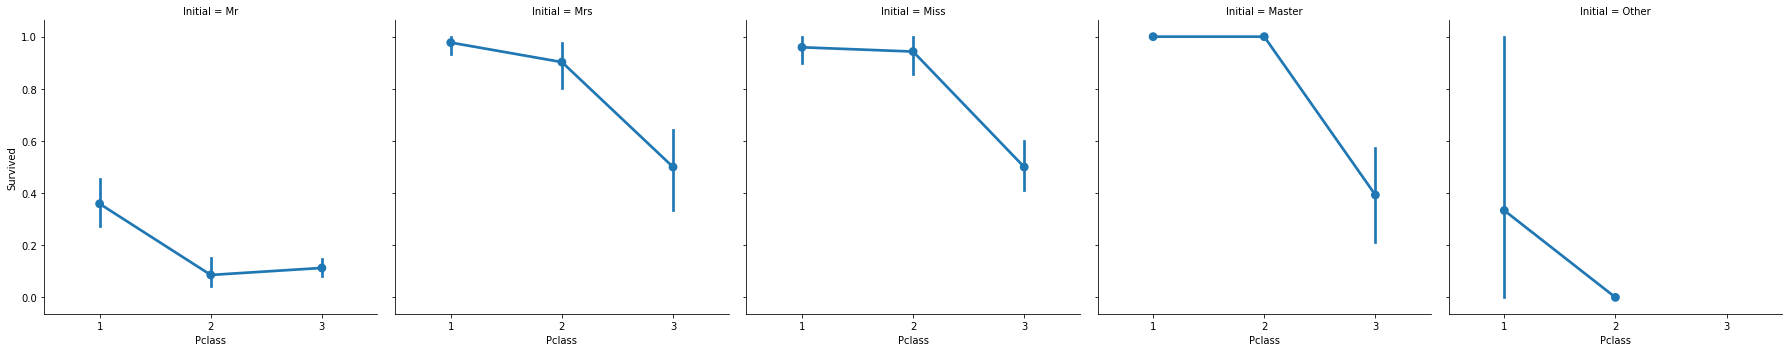

In [17]:
sns.catplot('Pclass','Survived',col='Initial',data=data, kind='point')
plt.show()

* It is clear that irrespective of the Pclass children and women were given priority in rescue.

### Embarked
**Meaning :** Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

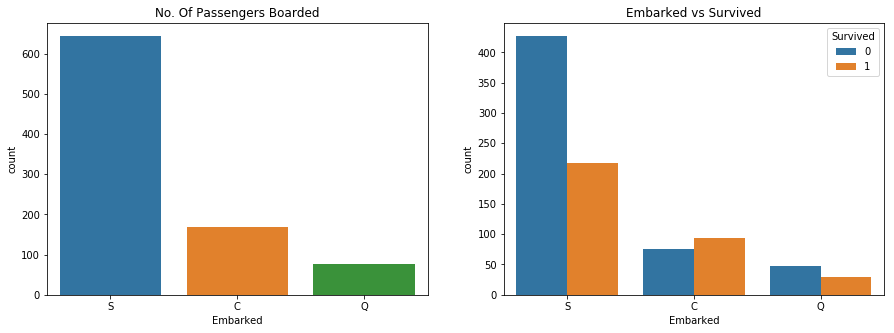

In [18]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot('Embarked',data=data,ax=ax[0])
ax[0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

* Majority of passengers borded from Southampton
1. * Survival counts looks better at C. Why?. Could there be an influence from sex and pclass features we already studied?. Let's find out 

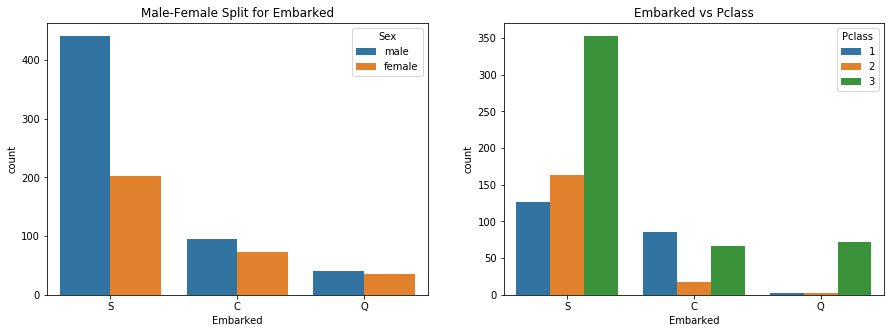

In [19]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0])
ax[0].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

* We guessed correctly. higher % of 1st class passegers boarding from C might be the reason.

#### Filling Embarked NaN

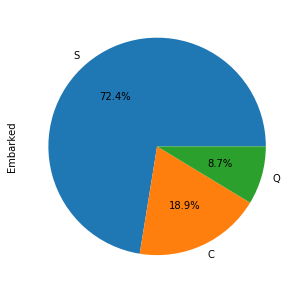

In [20]:
f,ax=plt.subplots(1,1,figsize=(5,5))
data['Embarked'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.1f%%',ax=ax)
plt.show()

* Since 72.5% passengers are from Southampton lets fill missing 2 values using S (Southampton)

In [21]:
data['Embarked'].fillna('S',inplace=True)

In [22]:
data.Embarked.isnull().any()

False

### SibSip
**Meaning :** Number of siblings / spouses aboard the Titanic

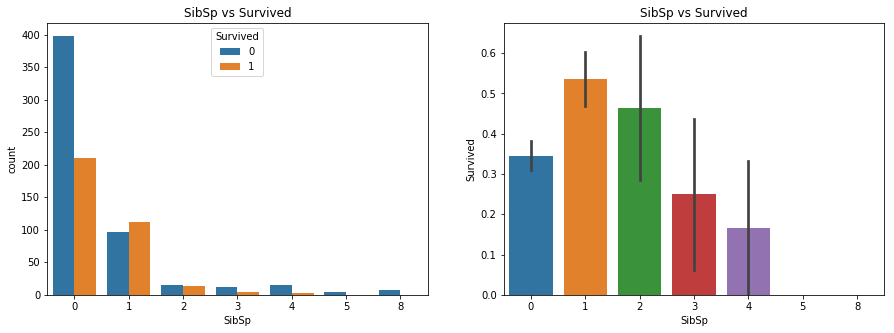

In [23]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot('SibSp',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.barplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

* The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. The reason?. May be PClass??

In [24]:
pd.crosstab(data.SibSp,data.Pclass, normalize='index').style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,0.225329,0.197368,0.577303
1,0.339713,0.263158,0.397129
2,0.178571,0.285714,0.535714
3,0.1875,0.0625,0.75
4,0,0,1
5,0,0,1
8,0,0,1


* Yes. Most large families had travelled in 3rd Class

### Parch
**Meaning :** Number of parents / children aboard the Titanic

### Fare
**Meaning :** Passenger fare

### Observations Summary

**Sex:** Survival chance for female is better than that for male.

**Pclass:** Being a 1st class passenger gives you better chances of survival.

**Age:** Age range 5-10 years have a high chance of survival.

**Embarked:** Majority of passengers borded from Southampton.The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. All most all Passengers at Q were from Pclass3.

### Correlation Between The Features

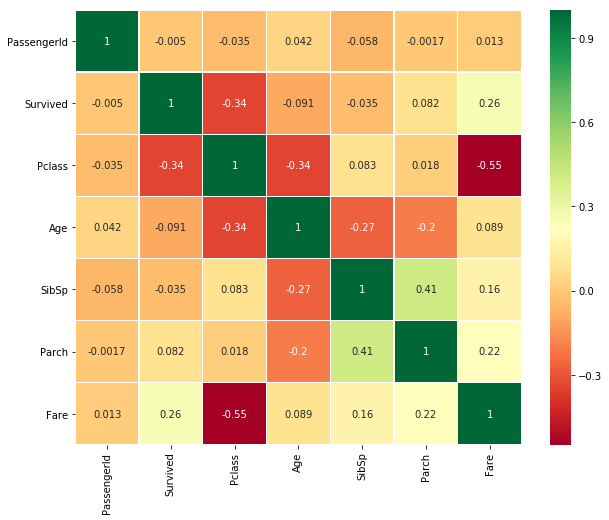

In [25]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## PART 2 : Feature Engineering and Data Cleaning
Now what is Feature Engineering? Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.


#### Converting String Values into Numeric
Since we cannot pass strings to a machine learning model, we need to convert features Sex, Embarked, etc into numeric values.

In [26]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### Dropping UnNeeded Features

Name--> We don't need name feature as it cannot be converted into any categorical value.

 --- Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

--- Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

--- Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.


In [27]:
#data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

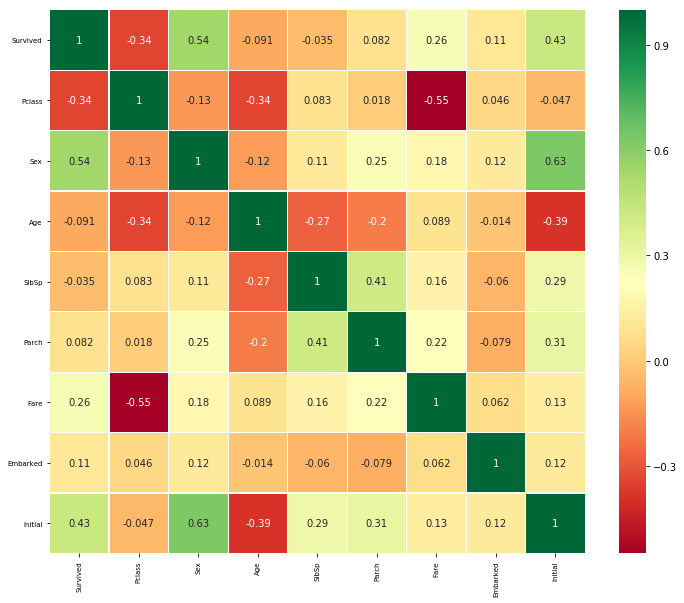

In [28]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

## PART 3 : Predictive Modeling


In [29]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
#from sklearn import svm #support vector Machine
#from sklearn.ensemble import RandomForestClassifier #Random Forest
#from sklearn.neighbors import KNeighborsClassifier #KNN
#from sklearn.naive_bayes import GaussianNB #Naive bayes
#from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
#from sklearn.metrics import confusion_matrix #for confusion matrix

In [30]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0


In [31]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [32]:
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
231,3,0,29.0,0,0,7.7750,0,0
836,3,0,21.0,0,0,8.6625,0,0
639,3,0,33.0,1,0,16.1000,0,0
389,2,1,17.0,0,0,12.0000,1,2
597,3,0,49.0,0,0,0.0000,0,0


In [33]:
train_Y.head()

,Survived
231,0
836,0
639,0
389,1
597,0


#### Logistic Regression

In [34]:
model = LogisticRegression(solver='liblinear')
model.fit(train_X,train_Y.values.ravel())
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8283582089552238


If You Like the notebook and think that it helped you..PLEASE UPVOTE. It will keep me motivated